# **Econometria Aplicada**

## Aula 2 - Regressão Múltipla e Formas Funcionais

---

**Motivação**:

A pandemia da Covid gerou desdobramentos para além das questões de saúde pública. As economias foram severamente afetadas, o que estimulou uma resposta intensa por parte dos gestores de política pública no que tange a condução das políticas monetária e fiscal. Em função de certas idiossincrasias, no entanto, as (intensidades das respostas) foram diferentes de uma país para outro. Nesse contexto, surgiu a seguinte dúvida: será que a resposta foi diferente em países mais democráticos? Por um lado, as estruturas para combate a eventos adversos extremos que acontecem de maneira abrupta podem já ter sido equacionada em países com instituições promotoras do crescimento e desenvolvimento econômico de longo prazo. Por outro lado, há quem possa argumentar que países não democráticos possuem menos restrições burocráticas e a resposta pode ser mais rápida e intensa. O que será que dizem os dados?

### **Dados**

- Nas atividades nós vamos utilizar os dados de Costa-Filho e Neto (2020) que estão no arquivo ‘costafilho_neto.Rdata’. 

- A base de dados contém 168 observações para diferentes países.

In [2]:
url <- "https://raw.githubusercontent.com/costafilhojoao/Teaching/main/Econometria%20Aplicada/Atividades/Atividade%202/costafilho_neto.RData"

In [3]:
download.file(url, "costafilho_neto.RData")

In [4]:
load("costafilho_neto.RData")


### **1. Vamos criar e manipular variáveis**


- A base de dados possui um ‘data frame’ intitulado
‘data’ com 15 variáveis. 

- Uma delas é nome da região em que o país se encontra (‘region’).

- Não podemos trabalhar com texto, mas podemos criar um código em cima dessa variável.

In [5]:
data$region_c <- as.numeric( as.factor( data$region ) )

- Agora, crie uma variável chamada de participação no mercado de trabalho,
‘part_100’, que nada mais é do que a variável ‘part’ multiplicada por 100.

- Utilize os comandos abaixo para (i) excluir a variável ‘part’ e (ii) renomear a variável ‘part_100’

In [6]:
data$part_100 <- as.numeric( 100 * data$part )

data <- subset( data, select = -c(part))

names( data )[names( data ) == "part_100"] <- "part"

In [7]:
head(data)

,code,democracy,region,income,country,gdppc,policy,gov,pop,emp,year,gini_disp,fiscal,macrofin,region_c,part
,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,NA,,,Afghanistan,NA,NA,NA,NA,NA,NA,NA,0.13369,0.0,1,NA
2,AGO,36.2,Sub-Saharan Africa,Lower middle income,Angola,5.004589,-1.6169320,13.340072,29.784193,15.389316,2016,NA,0.00000,0.0,8,51.66941
3,ALB,59.8,Europe & Central Asia,Upper middle income,Albania,11.628868,0.5792620,18.622828,2.930187,1.046984,2016,NA,1.30000,0.0,3,35.73095
4,ARE,27.6,Middle East & North Africa,High income,United Arab Emirates,65.587395,1.8105220,7.162914,9.400145,3.891850,2016,NA,1.80000,6.7,5,41.40202
5,ARG,70.2,Latin America & Caribbean,Upper middle income,Argentina,16.771372,-0.3473316,15.304314,44.271042,19.814985,2016,37.5,1.00000,0.0,4,44.75834
6,ARM,47.9,Europe & Central Asia,Upper middle income,Armenia,9.955628,-1.5346380,15.516405,2.930450,1.014478,2016,37.2,0.00000,0.0,3,34.61850


- Utilize os comandos abaixo para (i) ‘anexar’ o data frame ‘data’ e (ii) selecionar apenas algumas variáveis em outro dataframe ‘d’:

In [8]:
attach(data)

In [9]:
d <- data.frame(CESI = policy, Democracy = democracy, GDPpc = gdppc, GINI = gini_disp, GOV = gov, PART = part, REGION = region_c)

In [10]:
head(d)

,CESI,Democracy,GDPpc,GINI,GOV,PART,REGION
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,NA,NA,NA,NA,NA,NA,1
2,-1.6169320,36.2,5.004589,NA,13.340072,51.66941,8
3,0.5792620,59.8,11.628868,NA,18.622828,35.73095,3
4,1.8105220,27.6,65.587395,NA,7.162914,41.40202,5
5,-0.3473316,70.2,16.771372,37.5,15.304314,44.75834,4
6,-1.5346380,47.9,9.955628,37.2,15.516405,34.61850,3


#### **2. Estatísticas descritivas**


- Vamos utilizar o pacote ‘stargazer’ para fazermos uma tabela com estatísticas descritivas para as variáveis da nossa base ‘d’

In [11]:
install.packages("stargazer")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [12]:
library(stargazer)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 




In [13]:
stargazer(d, digits = 2, type = "text" )


Statistic  N  Mean  St. Dev.  Min   Max  
-----------------------------------------
CESI      152 0.06    1.31   -4.25  4.85 
Democracy 152 55.98  21.71   14.90 98.70 
GDPpc     152 19.68  19.90   0.73  100.06
GINI      79  35.66   7.76   23.40 64.90 
GOV       152 18.47   7.53   2.20  57.79 
PART      152 42.79   9.82   19.08 86.87 
REGION    168 4.47    2.41     1     8   
-----------------------------------------


#### **3. Vamos olhar para os dados**


- Faça gráficos de dispersões entre as seguintes variáveis (utilize o data frame intitulado ‘data’):

In [14]:
library(ggplot2)

In [21]:
# Definir tamanho personalizado
largura <- 10  # largura do gráfico em polegadas
altura <- 6    # altura do gráfico em polegadas

> ##### *a. `democracy` e `policy`*

Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”


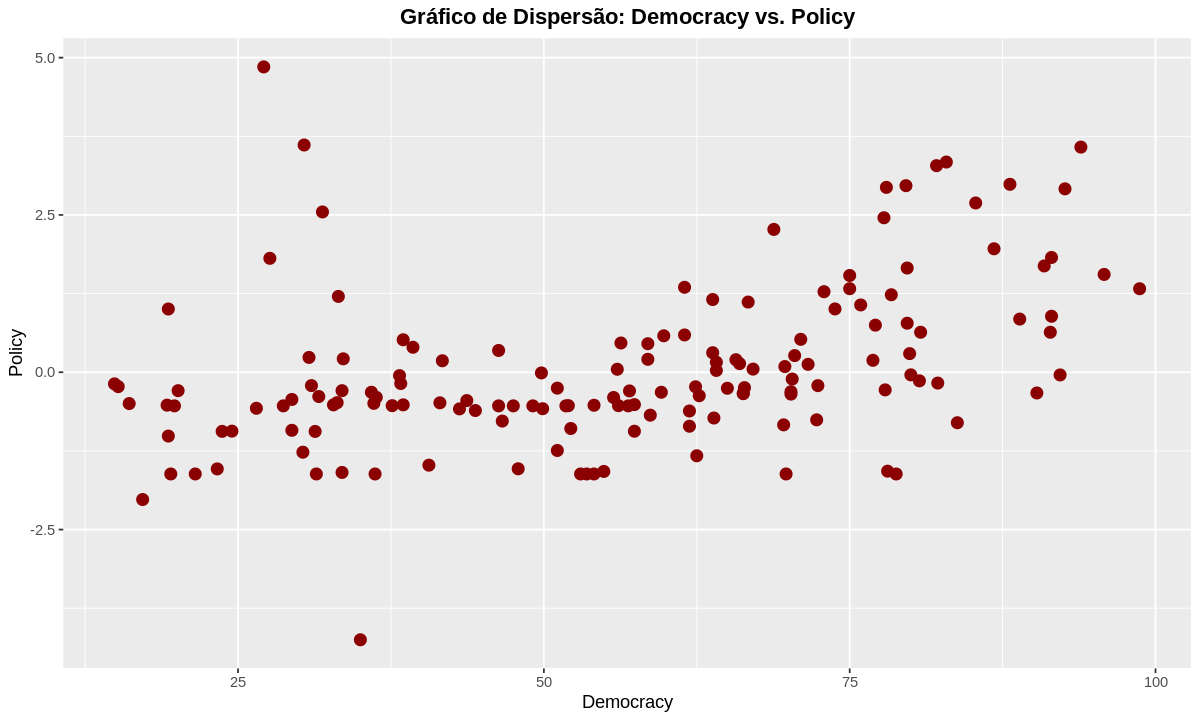

In [22]:
# Gráfico de dispersão com cor darkred
scatter_plot <- ggplot(data, aes(x = democracy, y = policy)) +
  geom_point(color = "darkred", size = 3) +
  xlab("Democracy") +
  ylab("Policy") +
  ggtitle("Gráfico de Dispersão: Democracy vs. Policy") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)

scatter_plot

> ##### *b. `democracy` e `policy`, mas apenas para 2 regiões: `South Asia` e `Europe & Central Asia`* 

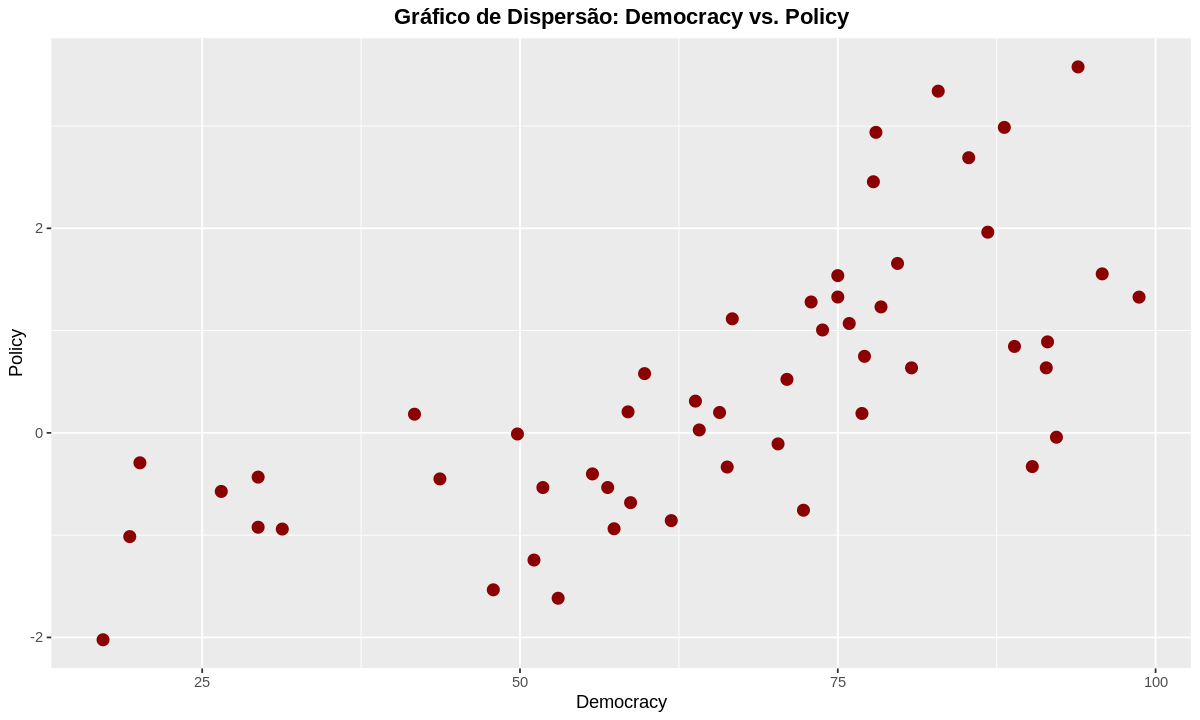

In [23]:
# Gráfico de dispersão com cor darkred
scatter_plot <- ggplot(subset(data, region %in% c('South Asia','Europe & Central Asia')),
 aes(x = democracy, y = policy)) +
  geom_point(color = "darkred", size = 3) +
  xlab("Democracy") +
  ylab("Policy") +
  ggtitle("Gráfico de Dispersão: Democracy vs. Policy") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)

scatter_plot

> Qual é a conclusão preliminar?

- Ao filtrar apenas para as regiões indicadas, a dispersão entre `policy` e `democracy` aparenta ter, visualmente, uma correlação positiva, ou seja, quanto maior a variável `democracy`, maior a variável `policy`

- Enquanto que ao observar todas as regiões em conjunto, não era observável visualmente de forma explícita qualquer tipo de relação entre variáveis

> ##### *c. PIB per capita `gdppc` e `policy`*

Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”


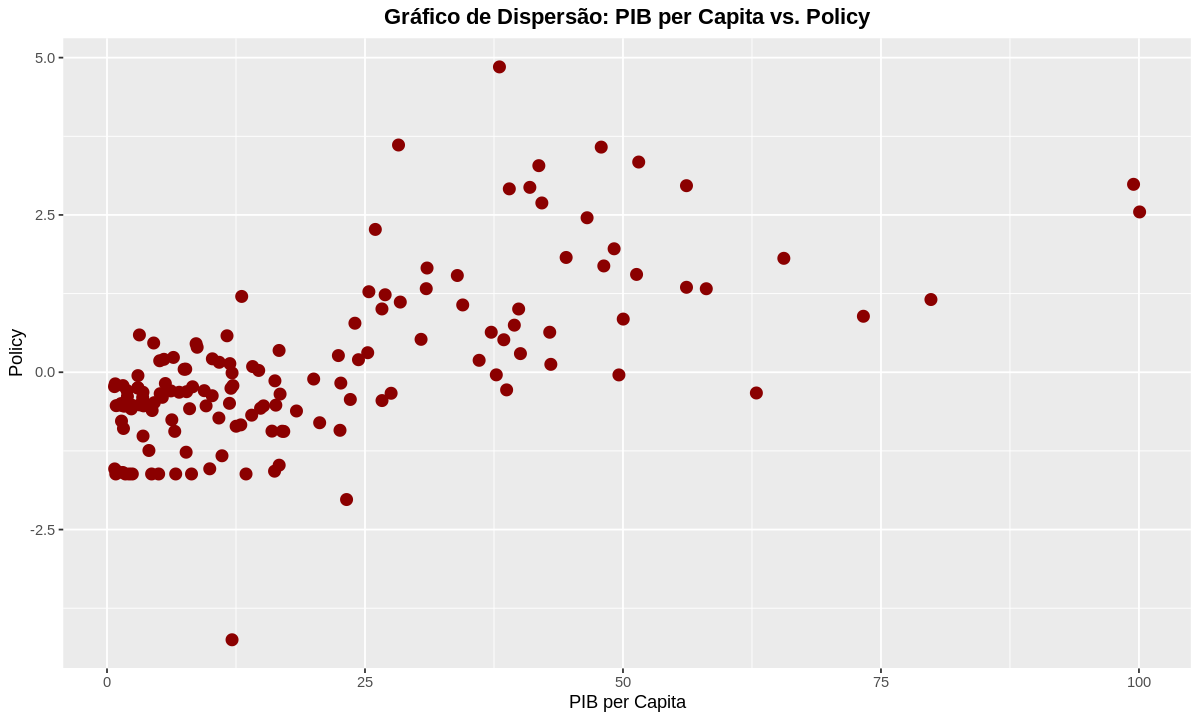

In [29]:
# Gráfico de dispersão com cor darkred
scatter_plot <- ggplot(data, aes(x = gdppc, y = policy)) +
  geom_point(color = "darkred", size = 3) +
  xlab("PIB per Capita") +
  ylab("Policy") +
  ggtitle("Gráfico de Dispersão: PIB per Capita vs. Policy") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)

scatter_plot

> ##### *d. `part` e `policy`*

Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”


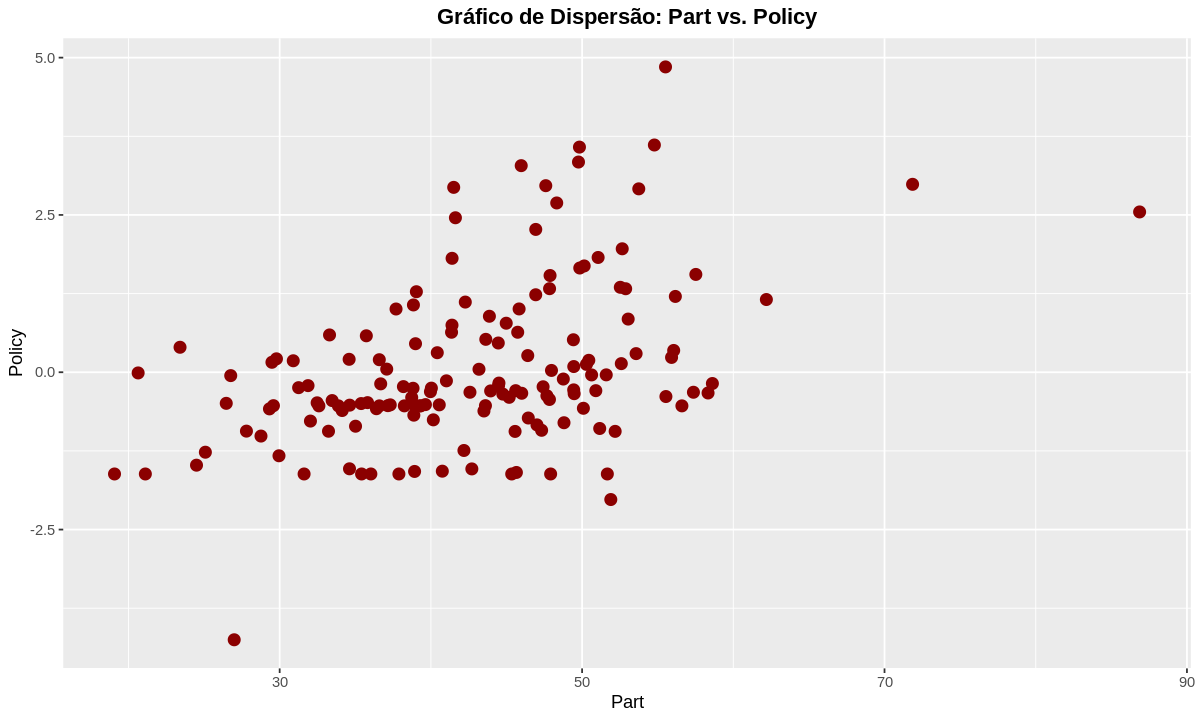

In [28]:
# Gráfico de dispersão com cor darkred
scatter_plot <- ggplot(data, aes(x = part, y = policy)) +
  geom_point(color = "darkred", size = 3) +
  xlab("Part") +
  ylab("Policy") +
  ggtitle("Gráfico de Dispersão: Part vs. Policy") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)

scatter_plot

> ##### *e. Uma medida de desigualdade, `gini_disp` e `policy`*

Warning message:
“Removed 89 rows containing missing values (`geom_point()`).”


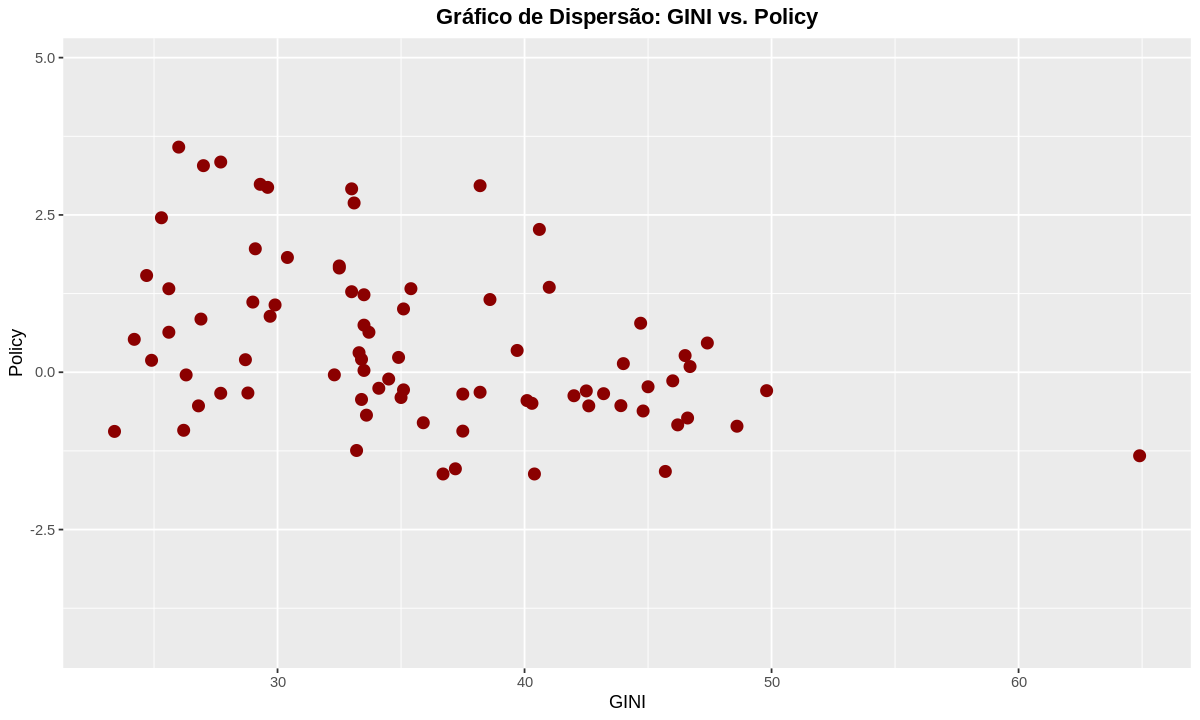

In [27]:
# Gráfico de dispersão com cor darkred
scatter_plot <- ggplot(data, aes(x = gini_disp, y = policy)) +
  geom_point(color = "darkred", size = 3) +
  xlab("GINI") +
  ylab("Policy") +
  ggtitle("Gráfico de Dispersão: GINI vs. Policy") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5))

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)

scatter_plot

#### **4. Regressão linear múltipla: os modelos**


> Lembre-se da pergunta que queremos responder:

- Há associação entre o nível de democracia e a intensidade das respostas de política econômica no primeiro ano da pandemia da Covid?

> Escreva a equação (genérica) que representa o modelo econométrico proposto para responder essa pergunta. 

- $policy_i = \beta_0 + \beta_1 * democracy_i + ɛ_i$

> Defina também o nível de significância com o qual vai trabalhar.

**Teste de hipótese para ${\beta}_1$:**

 - ${H}_0: \beta_1 = 0$
 - ${H}_a: \beta_1 \neq 0$

**Considerando nível de significância `α` de 5%:**

 - A relação entre *policy* e *democracy* será estatísticamente significativa se rejeitamos a hipótese nula de $\beta_{1} = 0$.

#### **5. Regressão linear múltipla: a estimativa**


- Avalie se a democracia está associada com a intensidade das respostas de política econômica no primeiro ano da pandemia da Covid.

- Para isso, reproduza as regressões da Tabela 4 de Costa-Filho e Neto (2020).

- Lembre-se de controlar pelas regiões.

> ##### *a. Qual é a conclusão sobre a resposta de política econômica para cada uma das regiões?*

- A regressão com todas as regiões em conjunto apresenta uma correlação positiva entre `policy` e `democracy` com um p-valor menor que o nível de significância de 5%

- Porém, ao analisar por região, das 8 regiões presentes no dataset, apenas 2 regiões apresentam correlação positiva entre `policy` e `democracy` com um p-valor menor que 5%

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 16 rows containing non-finite values (`stat_smooth()`).”
Warning message in qt((1 - level)/2, df):
“NaNs produced”
Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


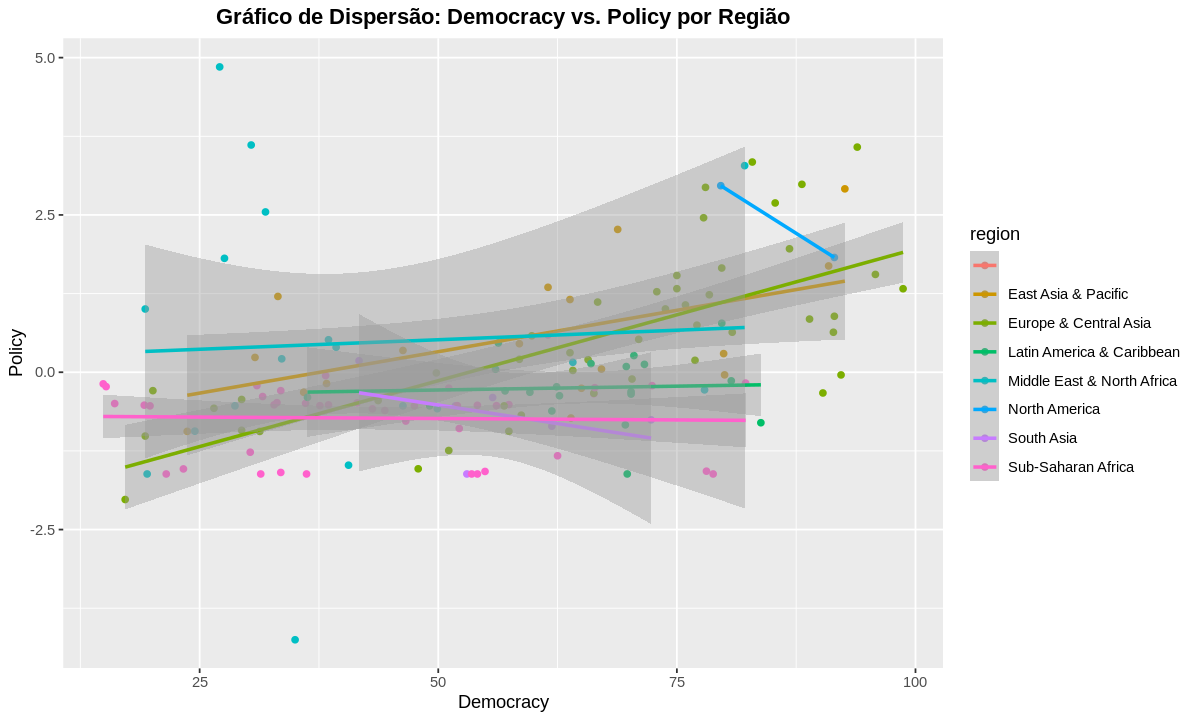

In [38]:
# Ajustar o tamanho do gráfico de output no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)

# Criar o gráfico de dispersão com cores diferentes para cada região e linha de regressão
ggplot(data, aes(x = democracy, y = policy, color = region)) +
  geom_point() +
  geom_smooth(method = "lm") +
  labs(title = "Gráfico de Dispersão: Democracy vs. Policy por Região",
       x = "Democracy",
       y = "Policy") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5),
        legend.position = "right")

> #### *Todas Regiões*

In [ ]:
summary( lm( policy ~ democracy, data = data ))


Call:
lm(formula = policy ~ democracy, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7882 -0.6669 -0.1678  0.4828  5.5141 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.339968   0.268363  -4.993 1.63e-06 ***
democracy    0.025036   0.004471   5.599 9.98e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.193 on 150 degrees of freedom
  (16 observations deleted due to missingness)
Multiple R-squared:  0.1729,	Adjusted R-squared:  0.1674 
F-statistic: 31.35 on 1 and 150 DF,  p-value: 9.976e-08


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 16 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 16 rows containing missing values (`geom_point()`).”


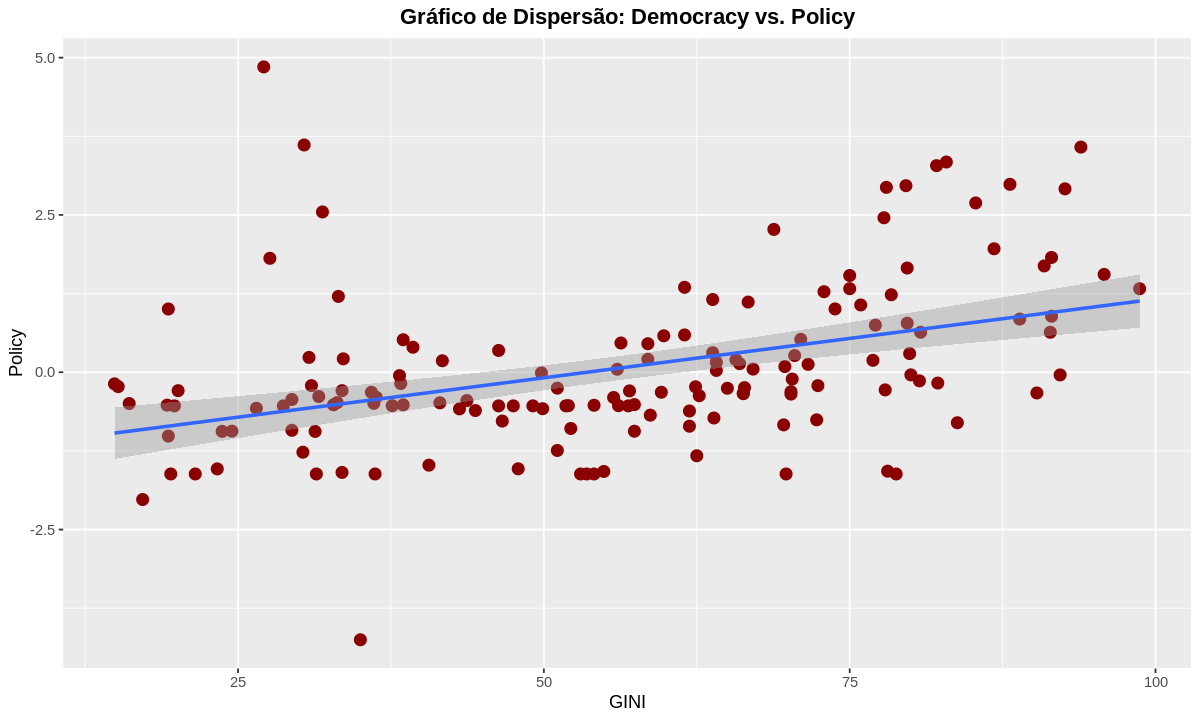

In [36]:
# Gráfico de dispersão com cor darkred
scatter_plot <- ggplot(data, aes(x = democracy, y = policy)) +
  geom_point(color = "darkred", size = 3) +
  xlab("GINI") +
  ylab("Policy") +
  ggtitle("Gráfico de Dispersão: Democracy vs. Policy") +
  theme(plot.title = element_text(face = "bold", hjust = 0.5)) +
  geom_smooth(method = lm, fullrange = TRUE) 

# Ajustar o tamanho do gráfico de dispersão no Google Colab
options(repr.plot.width = largura, repr.plot.height = altura)

scatter_plot

> #### *Região 1 - Países classificados como não-democráticos*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 1) ))

ERROR: ignored

> #### *Região 2 - East Asia & Pacific*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 2) ))


Call:
lm(formula = policy ~ democracy, data = subset(data, region_c == 
    2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41984 -0.72696 -0.09686  0.46587  1.46663 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.98980    0.68671  -1.441   0.1700  
democracy    0.02633    0.01103   2.388   0.0305 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9293 on 15 degrees of freedom
Multiple R-squared:  0.2754,	Adjusted R-squared:  0.2271 
F-statistic: 5.702 on 1 and 15 DF,  p-value: 0.03054


> #### *Região 3 - Europe & Central Asia*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 3) ))


Call:
lm(formula = policy ~ democracy, data = subset(data, region_c == 
    3))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.88324 -0.66952 -0.02291  0.54634  2.09717 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.228573   0.433044  -5.146 5.64e-06 ***
democracy    0.041884   0.006172   6.786 2.12e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9285 on 45 degrees of freedom
Multiple R-squared:  0.5057,	Adjusted R-squared:  0.4948 
F-statistic: 46.05 on 1 and 45 DF,  p-value: 2.12e-08


> #### *Região 4 - Latin America & Caribbean*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 4) ))


Call:
lm(formula = policy ~ democracy, data = subset(data, region_c == 
    4))

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3827 -0.1540 -0.0454  0.3324  0.9891 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.404016   0.725212  -0.557    0.584
democracy    0.002434   0.010979   0.222    0.827

Residual standard error: 0.5332 on 18 degrees of freedom
Multiple R-squared:  0.002723,	Adjusted R-squared:  -0.05268 
F-statistic: 0.04915 on 1 and 18 DF,  p-value: 0.827


> #### *Região 5 - Middle East & North Africa*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 5) ))


Call:
lm(formula = policy ~ democracy, data = subset(data, region_c == 
    5))

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6775 -1.0787 -0.3239  1.2409  4.4749 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.213562   1.287551   0.166     0.87
democracy   0.006059   0.029541   0.205     0.84

Residual standard error: 2.228 on 16 degrees of freedom
Multiple R-squared:  0.002623,	Adjusted R-squared:  -0.05971 
F-statistic: 0.04208 on 1 and 16 DF,  p-value: 0.8401


> #### *Região 6 - North America*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 6) ))


Call:
lm(formula = policy ~ democracy, data = subset(data, region_c == 
    6))

Residuals:
ALL 2 residuals are 0: no residual degrees of freedom!

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 10.59671        NaN     NaN      NaN
democracy   -0.09588        NaN     NaN      NaN

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 1 and 0 DF,  p-value: NA


> #### *Região 7 - South Asia*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 7) ))


Call:
lm(formula = policy ~ democracy, data = subset(data, region_c == 
    7))

Residuals:
       1        2        3        4        5        6 
 0.25399 -1.02500  0.28987 -0.05638  0.02927  0.50826 
attr(,"label")
[1] "policy"
attr(,"format.stata")
[1] "%10.0g"

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.65600    1.49034   0.440    0.683
democracy   -0.02355    0.02621  -0.898    0.420

Residual standard error: 0.6045 on 4 degrees of freedom
Multiple R-squared:  0.1678,	Adjusted R-squared:  -0.0402 
F-statistic: 0.8067 on 1 and 4 DF,  p-value: 0.4199


> #### *Região 8 - Sub-Saharan Africa*

In [ ]:
summary( lm( policy ~ democracy, data = subset(data, region_c == 8) ))


Call:
lm(formula = policy ~ democracy, data = subset(data, region_c == 
    8))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9077 -0.5742  0.2036  0.3900  1.3384 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -0.6896298  0.2395257  -2.879  0.00637 **
democracy   -0.0009111  0.0050438  -0.181  0.85757   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5792 on 40 degrees of freedom
Multiple R-squared:  0.000815,	Adjusted R-squared:  -0.02416 
F-statistic: 0.03263 on 1 and 40 DF,  p-value: 0.8576


> ##### *b. Por que o coeficiente da região 1 não aparece na regressão?*

- A região 1 não apresentou coeficiente relacionado a democracia, porque os países são classificados como não-democráticos, e por isso, a variável `democracy` é nula

## **Qual é a conclusão? Justifique.**

- Na média, avaliando os dados disponíveis, pode-se afirmar com nível de significância de 5% que o nível de democracia de um país tem uma relação linear diretamente proporcional com o o nível de resposta econômica no primeiro ano de pandemia de COVID-19

- Uma vez que ao analisar por região, essa mesma conclusão só é observada nas regiões **East Asia & Pacific** e **Europe & Central Asia**, pode-se inferir que os dados estão principalmente concentrados nessa região e que o comportamento médio não necessariamente pode ser válido em qualquer região 